## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK [12] : [Reinforcement Learning] </div>

#### <div align="center"> Semester Ganjil 2022/2023 </div>

In [14]:
# Run this code when you restart the machine
# Fill in with YOUR name and NIM
import datetime
import uuid

myName = "Gempar Bambang Godata"
myNIM = "00000056133"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Gempar Bambang Godata
NIM: 		00000056133
Start: 		2023-05-17 12:52:51.390557
Device ID: 	0f5593a5-f477-11ed-9971-8f0b15a9c6b6



---

### Dataset yang diambil dari repositori:

1. [CliffWalking-v0] – sumber : https://www.gymlibrary.dev/environments/toy_text/cliff_walking/


### Hasil kerja

#### 1. Installing OpenAI gym

In [14]:
!pip install gym

Defaulting to user installation because normal site-packages is not writeable


#### 2. Import required libraries

In [1]:
import gym
import itertools
import matplotlib
import matplotlib.style
import numpy as np
import pandas as pd
import sys

#### 3. Import the environment :

In [16]:
!pip install gym-gridworlds

Defaulting to user installation because normal site-packages is not writeable


#### 4. Create gym environment 

In [17]:
from collections import defaultdict
import gym_gridworlds
env = gym.make('WindyGridworld-v0')

import plotting

matplotlib.style.use('ggplot')

#### 5. Make the -greedy policy 

In [18]:
def createEpsilonGreedyPolicy(Q, epsilon, num_actions):
    def policyFunction(state):
        
        Action_probabilities = np.ones(num_actions,
                                dtype = float) * epsilon / num_actions
        
        best_action = np.argmax(Q[state])
        Action_probabilities[best_action] += (1.0-epsilon)
        return Action_probabilities
    
    return policyFunction

#### 6. Build Q-learning model

In [21]:
def qLearning(env, num_episodes, discount_factor = 1.0,
                          alpha = 0.6, epsilon = 0.1):
    # Action value function
    # A nested dictionary that maps
    # state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths = np.zeros(num_episodes),
        episode_rewards = np.zeros(num_episodes))

    # Create an epsilon greedy policy function
    # appropriately for environment action space
    policy = createEpsilonGreedyPolicy(Q, epsilon, env.action_space.n)

    # For every episode
    for ith_episode in range(num_episodes):
        
        # Reset the environment and pick the first action
        state = env.reset()

        for t in itertools.count():

            # get probabilities of all actions from current state
            action_probabilities = policy(state)
            
            # choose action according to
            # the probability distribution
            action = np.random.choice(np.arange(
                len(action_probabilities)),
                 p = action_probabilities)

            # take action and get reward, transit to next state
            next_state, reward, done, _ = env.step(action)

            # Update statistics
            stats.episode_rewards[ith_episode] += reward
            stats.episode_lengths[ith_episode] = t

            #TD Update
            best_next_action = np.argmax(Q[next_state])
            td_target = reward + discount_factor * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta

            # done is True if episode terminated
            if done:
                break

            state = next_state

    return Q, stats

#### 7. Train the model 

In [22]:
Q, stats = qLearning(env,1000)

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:225: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):


#### 8. Plot important statistics 

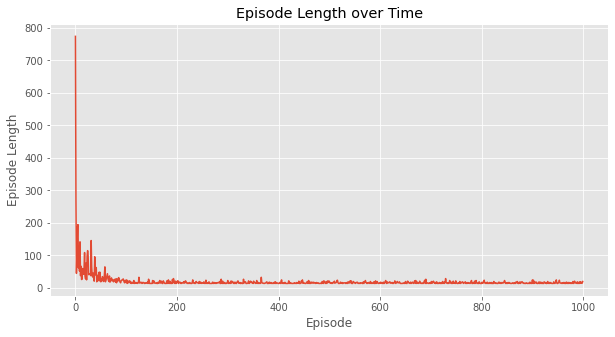

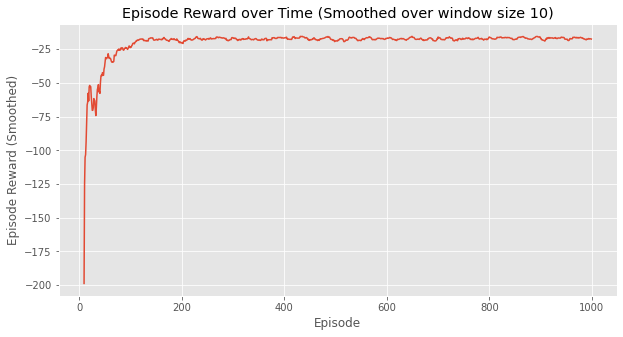

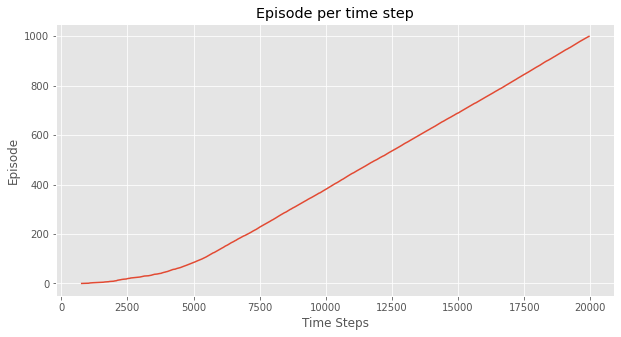

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [23]:
plotting.plot_episode_stats(stats)

#### 9. Importing the required libraries 

In [24]:
import numpy as np
import pylab as pl
import networkx as nx

#### 10.Defining and visualizing the graph 

In [25]:
edges = [(0,1), (1,5), (5,6), (5,4), (1,2),
         (1,3), (9,10), (2,4), (0,6), (6,7),
         (8,9), (7,8), (1,7), (3,9)]

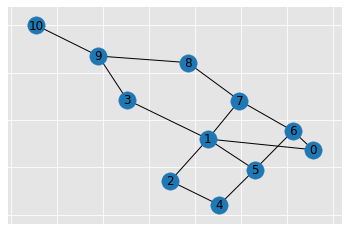

In [26]:
goal = 10
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
pl.show()

#### 11.Defining the reward the system for the bot 

In [27]:
MATRIX_SIZE = 11
M = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
M *= -1

for point in edges:
    print(point)
    if point[1] == goal:
        M[point] = 100
    else:
        M[point] = 0
    
    if point[0] == goal:
        M[point[::-1]] = 100
    else:
        M[point[::-1]] = 0

M[goal, goal] = 100
print(M)

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(1, 3)
(9, 10)
(2, 4)
(0, 6)
(6, 7)
(8, 9)
(7, 8)
(1, 7)
(3, 9)
[[ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.   0.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0. 100.]]


#### 12.Defining some utility functions to be used in the training 

In [28]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))

gamma = 0.75
initial_state = 1

#### Determines the available action for a given state

In [29]:
def available_actions(state):
    current_state_row = M[state, ]
    available_action = np.where(current_state_row >= 0)[1]
    return available_action

available_action = available_actions(initial_state)

#### Choose one of the available actions at random 

In [30]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_action,1))
    return next_action

action = sample_next_action(available_action)

#### Updating 

In [31]:
def update(current_state, action, gamma):
    max_index = np.where(Q[action, ] == np.max(Q[action, 1]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size =1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    Q[current_state, action] = M[current_state, action] + gamma * max_value
    if (np.max(Q) > 0):
        return (np.sum(Q/np.max(Q)*100))
    else:
        return (0)

In [32]:
update(initial_state, action, gamma)

0

#### 13.Training and evaluating the bot using the Q-Matrix

In [33]:
scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_action = available_actions(current_state)
    action = sample_next_action(available_action)
    score = update(current_state, action, gamma)
    scores.append(score)

Most efficient path:
[0, 3, 1, 1, 8, 10]


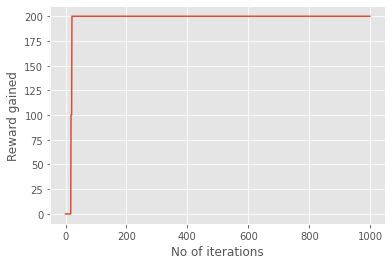

In [34]:
current_state = 0
steps = [current_state]

while current_state != 10:
    next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index
    
print("Most efficient path:")
print(steps)

pl.plot(scores)
pl.xlabel('No of iterations')
pl.ylabel('Reward gained')
pl.show()

#### 14.Defining and visualizing the new graph with the environment clues

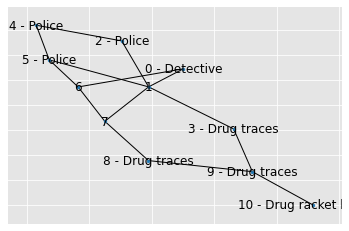

In [35]:
police = [2,4,5]
drug_traces = [3,8,9]

G = nx.Graph()
G.add_edges_from(edges)
mapping = {0:'0 - Detective', 1:'1', 2:'2 - Police', 3:'3 - Drug traces',
           4:'4 - Police', 5:'5 - Police', 6:'6', 7:'7', 8:'8 - Drug traces',
           9:'9 - Drug traces', 10:'10 - Drug racket location'}

H = nx.relabel_nodes(G, mapping)
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H, pos, node_size = 8)
nx.draw_networkx_edges(H, pos)
nx.draw_networkx_labels(H, pos)
pl.show()

#### 15.Defining some utility functions for the training process 

In [36]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
env_police = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
env_drugs = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
initial_state = 1

In [37]:
def availabe_actions(state):
    current_state_row = M[state, ]
    av_action = np.where(current_state_row >= 0)[1]
    return av.action

In [38]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_action,1))
    return next_action

In [39]:
def collect_environmental_data(action):
    found = []
    if action in police:
        found.append('p')
    if action in drug_traces:
        found.append('d')
    return (found)

available_action = available_actions(initial_state)
action = sample_next_action(available_action)

In [40]:
def update(current_state, action, gamma):
    max_index = np.where(Q[action, ] == np.max(Q[action, 1]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size =1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    Q[current_state, action] = M[current_state, action] + gamma * max_value
    environment = collect_environmental_data(action)
    if 'p' in environment:
        env_police[current_state, action] += 1
    if 'd' in environment:
        env_drugs[current_state, action] += 1
    if (np.max(Q)>0):
        return (np.sum(Q/np.max(Q)*100))
    else:
        return (0)

update(initial_state, action, gamma)

0

In [41]:
def available_actions_with_env_help(state):
    current_state_row = M[state, ]
    av_action = np.where(current_state_row >= 0)[1]
    
    env_pos_row = env_matrix_snap[state, av_action]
    
    if(np.sum(env_pos_row < 0)):
        temp_av_action = av_action[np.array(env_pos_row)[0]>=0]
        if len(temp_av_action) > 0:
            av_action = temp_av_action
    return av_action

#### 16.Visualizing the environmental metrics 

In [42]:
scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_action = available_actions(current_state)
    action = sample_next_action(available_action)
    score = update(current_state, action, gamma)

In [43]:
print('Police_Found')
print(env_police)
print('')
print('Drug traces Found')
print(env_drugs)

Police_Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 17.  0.  0. 18.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 48.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 50.  0.  0. 46.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 33.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 27.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

Drug traces Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 18.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 47.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 35.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 51.  0.]
 [ 0.  0.  0. 22.  0.  0.  

### Q-Learning Example

#### 17.Let’s started. We can load the game environment and render what it looks like

In [44]:
!pip install pygame

Defaulting to user installation because normal site-packages is not writeable


### Taxi

In [45]:
import gym
env = gym.make("Taxi-v3",render_mode='human')
env.reset()
env.render()

#### 18.Here’s our restructured problem statement : “There are 4 location (labeled by different letters), and our job is to pick up the passenger at one location and drop him/her off at another. We receive +20 points for a successful drop-off and lose 1 point every time-step it takes. There is also a 10 point penalty for illegal pick up and drop off actions.” Let’s dive more into the environment

In [46]:
env.reset()
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(6)
State Space Discrete(500)


#### 19.We can actually take our illustration above, encode its state, and give it to the environment to render in Gym. Recall that we have the taxi at row 3, column 1, our passenger is at location 2 and our destination is location 0. Using the Taxi-v3 state encoding method, we can do the following : 

In [47]:
state = env.encode(3,1,2,0)
print("State:", state)

env.s = state
env.render()

State: 328


#### 20.When the Taxi environment is created, there is an initial Reward table that’s also created, called ‘P’. We can think of it like a matrix that has the number of states as rows and number of actions as columns, i.e : 𝑠𝑡𝑎𝑡𝑒𝑠 × 𝑎𝑐𝑡𝑖𝑜𝑛𝑠 matrix. Since every state is in this matrix, we can see the default reward values assigned to our illustration’s state : 

In [48]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

### Cliff-Walking

In [49]:
import gym
env = gym.make("CliffWalking-v0")
env.reset()
env.render()

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\gym\envs\toy_text\cliffwalking.py:167: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("CliffWalking-v0", render_mode="rgb_array")
  logger.warn(


In [50]:
env.reset()
env.render()
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(4)
State Space Discrete(48)


In [51]:
state = env.step(0)
print("State:", state)

env.s = state
env.render()

State: (24, -1, False, False, {'prob': 1.0})


In [52]:
state = env.step(0)
print("State:", state)

env.s = state
env.render()

State: (12, -1, False, False, {'prob': 1.0})


In [53]:
env.P[24]

{0: [(1.0, 12, -1, False)],
 1: [(1.0, 25, -1, False)],
 2: [(1.0, 36, -1, False)],
 3: [(1.0, 24, -1, False)]}

In [3]:
import numpy as np
import gym

In [4]:
#Building the environment
env = gym.make('FrozenLake-v1')

In [5]:
# Defining the different parameters
epsilon = 0.9
total_episodes = 10000
max_steps = 100
alpha = 0.85
gamma = 0.95

# Initializing the Q-matrix
Q = np.zeros((env.observation_space.n, env.action_space.n))

In [6]:
# Function to choose the next action
def choose_action(state):
    action = 0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])
    return action

# Function to learn the Q-value
def update(state, state2, reward, action, action2):
    predict = Q[state, action]
    target = reward + gamma * Q[state2, action2]
    Q[state, action] = Q[state, action] + alpha * (target - predict)

In [12]:
#Initializing the reward
reward=0

# Starting the SARSA learning
for episode in range(total_episodes):
    t = 0
    state1 = env.reset()
    action1 = choose_action(state1)
    while t < max_steps:
        
        #Visualizing the training
        env.render()

        #Getting the next state
        state2, reward, done, info = env.step(action1)
        
        #Choosing the next action
        action2 = choose_action(state2)

        #Learning the Q-value
        update(state1, state2, reward, action1, action2)
        
        state1 = state2
        action1 = action2

        #Updating the respective vaLues
        t += 1
        reward += 1

        #If at the end of learning process
        if done:
            break

ValueError: too many values to unpack (expected 4)

In [13]:
#Evaluating the performance
print ("Performance : ", reward/total_episodes)

#Visualizing the Q-matrix
print(Q)

Performance :  0.0
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Kesimpulan


Reinforcement learning merupakan tipe algoritma pada machine learning yang memfokuskan pada suatu agent untuk mengambil tindakan dengan memaksimalkan reward pada situasi tertentu. Contohnya pada cliff-walking yang digunakan diatas.

Cliff-Walking merupakan sebuah game yang dimana agent nya tidak boleh berjalan melewati cliff atau jurang yang mana rewardnya sebesar -100, ketika agent berjalan di area cliff mana agent akan dikenakan reward -100 serta mengulang dari titik awal di bagian paling kiri baris ke 3/[3,0]. Sedangkan, jika agent berjalan di jalan biasa, akan mendapatkan reward -1 sampai menuju goal yang berada di ujung kanan bawah yg berada pada kotak ke-11 di baris ke 3/[3,11], sedangkan jurangnya berada sebelah kanan titik awal sampai sebelah kiri goal / [3,1-10].

Agent tersebut harus bisa berjalan tanpa melewati cliff. Hal ini didapati dengan agent belajar pada policy/reward tersebut, yg semakin lama agent akan tau area cliff dibagian mana sehingga mampu menghindari area cliff tersebut dan mampu menuju goal nya.


In [15]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 	Gempar Bambang Godata
NIM: 	00000056133
Time-stamp:	2023-05-17 12:53:03.769895


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [ ]:
#!jupyter nbconvert --to html "./IF540L_Kelas_A_laporan_M12_00000067643_Gempar Bambang Godata.ipynb" --output-dir="./"

### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#